## Genetic Algorithms using pygad lib - knapsack problem

#### This script exemplifies a problem of filling up a knapsack with travel items - each with an importance value number and mass, by modeling an objective function (maximum importance value items packed), based on decision variables (binary format: 1 - included or 0 - excluded) and some restrictions regarding the total mass of the final knapsack. The objective is to find the most important items that should be included (and the least important ones that should not), so that the maximum importance value sum is reached, for the final set of packaged items. Part of restrictions concerns to the "weight" (mass in grams) of the total set of items included. It should be included the most important items but limited to the maximum total weight. After modeling, the solver is used to solve the problem and the results are returned with the final sum of importance values of the items included (objective function's value), as well as the binary flag of inclusion (or not) of each individual item - 0 or 1 (decision variables' values). Here, instead of the traditional deterministic linear programming, stochastic evolutionary computation is used through genetic algorithms. For a bigger number of variables, this problem would probably be computed successfully, although no optimal solution is guaranteed - the solutions would converge to a satisfatory solution - way better than complete randomness' solutions. Here, only nine decision variables are used.

In [6]:
pip install pygad --quiet

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pygad
import pandas as pd

In [8]:
# creating a knapsack DataFrame for storing the names, importance values and masses for all items, respectively to the index - 
# from index 0 until index 8 of the items list. These value and mass' coefficients will be used inside the ga_instance and through
# the fitness_function (objective function), along with the decision variables (internally set), to calculate the total value of 
# the fitness_function of each generation solution, until it converges to an optimal or sub-optimal best solution or the max 
# generation number limit is reached
knapsack_df = pd.DataFrame({
    "item_list": ["cereal_bar", "coat", "tennis", "cell_phone", "water_bottle", "sunscreen", "lip_balm", "oxygen_bottles", 
                   "camera"],
    "value_list": [6,7,3,2,9,5,2,10,6],
    "mass_list": [200,400,400,100,1000,200,30,3000,500]
})

# defining the fitness function (to be used at the ga_instance), by setting what to calculate and return as a quantitative measure
# for the current solution to be evaluated amongst others. Here, a current_total_value is defined to calculate, from the current 
# solution being analysed, the sum of importance values of each item included at that solution, i.e., the items whose decision 
# variable is 1, and not the importance values of items not included, i.e., those whose decision variable is 0. Additionally, a 
# current_total_mass is defined to calculate, also for the current solution, the sum of the mass of all items included at that 
# solution, but not the mass of items not included. Finally, the current_total_value is returned as the result for this fitness 
# function, as long as the restriction is obeyed, that is, if the current_total_mass is <= 5000g. Otherwise, it returns 0, as the 
# objective function for that current solution. The solutions with higher importance values returned from the fitness function 
# will be positively "selected" for next generations, while the solutions with low or zero importance values will be negatively 
# selected
def my_fitness_function(ga_instance, solution, solution_idx):
    current_total_value = sum(knapsack_df['value_list'][i] for i in range(9) if solution[i] == 1)
    current_total_mass = sum(knapsack_df['mass_list'][i] for i in range(9) if solution[i] == 1)
    return current_total_value if current_total_mass <= 5000 else 0

# instantiating the genetic algorithm Object, which receives all needed hyperparameters for the calculation of the solutions
# at each generation. This ga_instance, by evolutive computation, and using genetic algorithms, ultimately generates the best 
# solution, either optimal or suboptimal one. For each solution (including the best one) it keeps the fitness function value as 
# well, so that we can know the decision variables for the best solution and as well as the total value of the objective (fitness) 
# function of such solution. Each current solution generated at the ga_instance is tested at the fitness function, which, in turn, 
# calculates the total importance value and mass for that current solution according to the coefficients declared at the 
# value_list and mass_list of the modeled DataFrame, initially defined.
ga_instance = pygad.GA(num_generations=20, sol_per_pop=10, num_parents_mating=5, fitness_func=my_fitness_function, num_genes=9, 
                       gene_type=int, gene_space=[0,1], parent_selection_type="rws", keep_elitism=1, crossover_type="single_point",
                       crossover_probability=0.8, mutation_type="random", mutation_probability=0.05, mutation_percent_genes=10, 
                       random_seed=49)
ga_instance.run()
best_solution, best_solution_fitness, best_match_idx = ga_instance.best_solution()

# showing the best solution - list of decision variables' binary values - and the fitness function value - sum of importance 
# values of included items, only. Next, iterating the enumeration of decision variables from the best solution, for showing each
# individual item name, importance value and mass, and which ones have been included and not included at that optimal or 
# sub-optimal final solution.
print("Best solution: ", best_solution)
print("Best solution fitness (objective function value): ", best_solution_fitness)
for i, included in enumerate(best_solution):
    if included: print(f"{knapsack_df['item_list'][i]} ({knapsack_df['value_list'][i]}, {knapsack_df['mass_list'][i]}g) ✅")
    else: print(f"{knapsack_df['item_list'][i]} ({knapsack_df['value_list'][i]}, {knapsack_df['mass_list'][i]}g) ❌")


Best solution:  [1 1 1 1 0 1 1 1 1]
Best solution fitness (objective function value):  41
cereal_bar (6, 200g) ✅
coat (7, 400g) ✅
tennis (3, 400g) ✅
cell_phone (2, 100g) ✅
water_bottle (9, 1000g) ❌
sunscreen (5, 200g) ✅
lip_balm (2, 30g) ✅
oxygen_bottles (10, 3000g) ✅
camera (6, 500g) ✅


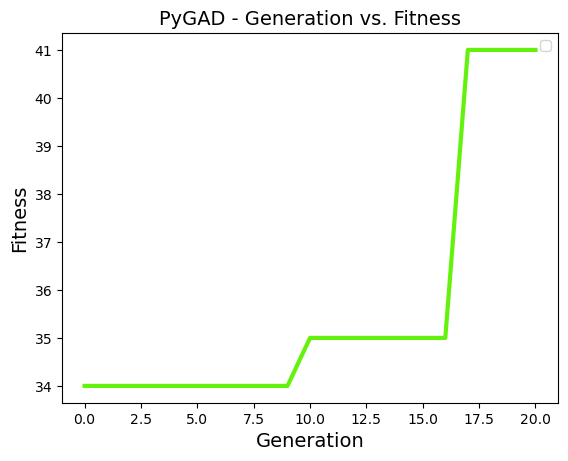

In [9]:
ga_instance.plot_fitness();

#### As a conclusion, and considering the maximization of importance values of items included at the knapsack, and as we here use a stochastic evolutionary computation approach (instead of linear programming or other deterministic ones), we have many "best" solutions proposed by the genetic algorithms instance, each time it runs. One of those, for example, the one we would include all except the water bottle, with the restriction <=5000g being obeyed and the objetive function being 41... similar to the solution we reached deterministically by using linear programming - and thus is the optimal solution - check that at this other script: [knapsack-problem-lp-pulp.ipynb](./knapsack-problem-lp-pulp.ipynb). With genetic algorithms, the results will differ, at each execution, even if you do not change the coefficients at the modeled DataFrame, differently from the linear programming approach. The solutions, therefore, are expected to converge to a most prevalent "best" solution, although, there's no guaratee that solution actually will be the optimal one - unless you execute the same problem using determinist approaches, which we did. For many decision variables' problems, on which it might be even impossible to use determinist approaches (because of the gigantic number of possible combinations to be individually tested deterministically), stochastic evolutionary computation as genetic algorithms might be useful. Also, the higher some of the hyperparameters you set (for instance, the num_generations and sol_per_pop), the more similar results you'll get - and the least the deviation will be regarding the most prevalent one.

#### P.S.: There might be a bug somehwere throughout this script because the objective function sometimes displays the wrong value for the sum of importance values of items included at the best solution, although the list of items, included and excluded, is ok. On the graphic, it also shows different converged values regarding the actual best solution fitness result. Other times it shows everything ok. I gotta investigate that inconsistency, later... if it actually is a bug or a result from the stochastic nature of the algorithm. A random seed of 49 has been set at the ga_instance instantiation for minimizing that problem, and keep the current solution constant and correct... which is the same solution found at the deterministic linear program script (link above).